# Example 2#

Tuning the hyper-parameters of LS-SVM regression models using the scikit-learn GridsearchCV function.
The synthetic data used for this purpose is the 1D Sinc function.

In [1]:
#Some imports
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

from LSSVMRegression import LSSVMRegression

In [2]:
#Generating the synthetic data
x=np.array([np.random.uniform(low=-5,high=5,size=10)]).T
#array([[0,1,2,3]]).T  #create a column vector of 1 feature, 4 samples
y=np.sinc(x).ravel()  #create the associated targets, needs to be a 1D array
ndata=x.shape[0]           #keep track of the number of rows

#print("x=",x,",\nx-dim=",x.ndim)
#print("y=",y,"\ny-dim=",y.ndim)

In [34]:
#rbf-model
clfrbf=LSSVMRegression(
        gamma=100,       #set the gamma-hyper parameter equal to 1
        kernel='rbf', #use the linear kernel
        sigma=1.0,
        c=1000,
        d=20,
            )
clfrbf.fit(x,y) # train our model, aka solve the set of linear equations
print("b = ",clfrbf.intercept_)
print("a_i = ",clfrbf.coef_)


b =  0.13648392571666296
a_i =  [-0.14583382 -0.49984568  2.23610396 -3.16706402 -3.28915643  1.93819891
 -0.80041643  0.36446155  0.94245121  2.42110074]


Yexact= [3.89817183e-17 1.00095984e-03 2.00367839e-03 ... 2.00367839e-03
 1.00095984e-03 3.89817183e-17]
Ypred= [0.19366371 0.19290831 0.1921429  ... 0.0435799  0.04375872 0.0439407 ]
Mean squared error: 0.02
Coefficient of determination: 0.76


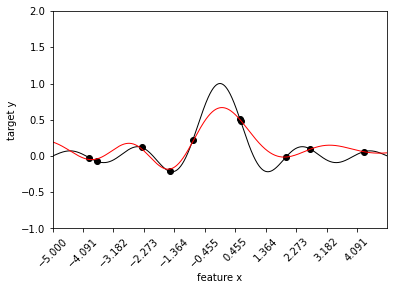

In [35]:
#generate a dens mesh
xmin=-5
xmax=5
xPred=np.linspace((xmin,),(xmax,),2001)
yExact=np.sinc(xPred).ravel()
# and predict
yPred=clfrbf.predict(xPred)

print("Yexact=",yExact)
print("Ypred=",yPred)

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(yExact, yPred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(yExact, yPred))
# Plot outputs
plt.scatter(x, y,  color='black')
plt.plot(xPred, yExact,  color='black',linewidth=1)
plt.plot(xPred, yPred,   color='red'  ,linewidth=1)

plt.axis([xmin,xmax,-1,2])
step=(xmax-xmin)/11.0
Xlst=list()
for a in np.arange(xmin,xmax,step):
    Xlst.append(a)
plt.xticks(Xlst,rotation=45)
#plt.xticks([-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8])
plt.yticks([-1,-0.5,0,0.5,1.0,1.5,2.0])
plt.xlabel("feature x")
plt.ylabel("target y")

plt.show()